# EDA

In [ ]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

## 제주도 관광지 데이터

In [ ]:
place = pd.read_excel('jeju_place.xlsx')
place.head()

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,제주국제공항,제주특별자치도,제주시,제주 제주시 공항로 2-0,기타관광,교통시설,803524
1,2,동문재래시장,제주특별자치도,제주시,제주 제주시 관덕로14길 20-0,쇼핑,시장,301089
2,3,서귀포매일올레시장,제주특별자치도,서귀포시,제주 서귀포시 중앙로62번길 18-0,쇼핑,시장,267930
3,4,함덕해수욕장,제주특별자치도,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
4,5,성산일출봉,제주특별자치도,서귀포시,제주 서귀포시 일출로 284-12,자연관광,자연경관(산),195037


In [ ]:
place.tail()

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
495,495,퍼시픽마리나,제주특별자치도,서귀포시,제주 서귀포시 중문관광로 154-17,레저스포츠,수상레저스포츠,1913
496,497,쉬리의언덕,제주특별자치도,서귀포시,제주 서귀포시,기타관광,기타관광,1908
497,498,선운정사,제주특별자치도,제주시,제주 제주시 구몰동길 65-0,역사관광,종교성지,1902
498,499,난타공연장,제주특별자치도,제주시,제주 제주시 선돌목동길 56-26,문화관광,공연시설,1899
499,500,쇠와꽃승마장,제주특별자치도,서귀포시,제주 서귀포시 섭지코지로25번길 88-17,레저스포츠,육상레저스포츠,1895


In [ ]:
place.describe()

,순위,검색건수
count,500.000000,500.0000
mean,250.472000,18153.8080
std,144.450064,46217.1129
min,1.000000,1895.0000
25%,125.750000,3565.0000
50%,250.500000,6894.5000
75%,375.250000,14538.2500
max,500.000000,803524.0000


In [ ]:
place.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   순위        500 non-null    int64 
 1   관광지명      500 non-null    object
 2   광역시/도     500 non-null    object
 3   시/군/구     500 non-null    object
 4   도로명주소     500 non-null    object
 5   중분류 카테고리  500 non-null    object
 6   소분류 카테고리  500 non-null    object
 7   검색건수      500 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [ ]:
# 순위 컬럼을 인덱스로
place = place.set_index('순위')
place

,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
순위,,,,,,,
1,제주국제공항,제주특별자치도,제주시,제주 제주시 공항로 2-0,기타관광,교통시설,803524
2,동문재래시장,제주특별자치도,제주시,제주 제주시 관덕로14길 20-0,쇼핑,시장,301089
3,서귀포매일올레시장,제주특별자치도,서귀포시,제주 서귀포시 중앙로62번길 18-0,쇼핑,시장,267930
4,함덕해수욕장,제주특별자치도,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
5,성산일출봉,제주특별자치도,서귀포시,제주 서귀포시 일출로 284-12,자연관광,자연경관(산),195037
...,...,...,...,...,...,...,...
495,퍼시픽마리나,제주특별자치도,서귀포시,제주 서귀포시 중문관광로 154-17,레저스포츠,수상레저스포츠,1913
497,쉬리의언덕,제주특별자치도,서귀포시,제주 서귀포시,기타관광,기타관광,1908
498,선운정사,제주특별자치도,제주시,제주 제주시 구몰동길 65-0,역사관광,종교성지,1902


In [ ]:
# 광역시/도에 제주도만 있는지 확인 -> drop

place['광역시/도'].unique()

array(['제주특별자치도'], dtype=object)

In [ ]:
place = place.drop('광역시/도', axis=1)

In [ ]:
place

,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
순위,,,,,,
1,제주국제공항,제주시,제주 제주시 공항로 2-0,기타관광,교통시설,803524
2,동문재래시장,제주시,제주 제주시 관덕로14길 20-0,쇼핑,시장,301089
3,서귀포매일올레시장,서귀포시,제주 서귀포시 중앙로62번길 18-0,쇼핑,시장,267930
4,함덕해수욕장,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
5,성산일출봉,서귀포시,제주 서귀포시 일출로 284-12,자연관광,자연경관(산),195037
...,...,...,...,...,...,...
495,퍼시픽마리나,서귀포시,제주 서귀포시 중문관광로 154-17,레저스포츠,수상레저스포츠,1913
497,쉬리의언덕,서귀포시,제주 서귀포시,기타관광,기타관광,1908
498,선운정사,제주시,제주 제주시 구몰동길 65-0,역사관광,종교성지,1902


In [ ]:
# 장소데이터 -> 중불류 여러 개 -> drop(x) -> 중분류 기준으로 데이터를 나눠볼 순 있다.
place['중분류 카테고리'].unique()

array(['기타관광', '쇼핑', '자연관광', '문화관광', '레저스포츠', '체험관광', '역사관광'],
      dtype=object)

In [ ]:
# null

place.isna().sum()

관광지명        0
시/군/구       0
도로명주소       0
중분류 카테고리    0
소분류 카테고리    0
검색건수        0
dtype: int64

In [ ]:
# 중분류

mid_cat = place['중분류 카테고리'].value_counts()  # 제주도 관광지 검색 중 자연 관광영역이 가장 많이 검색됨

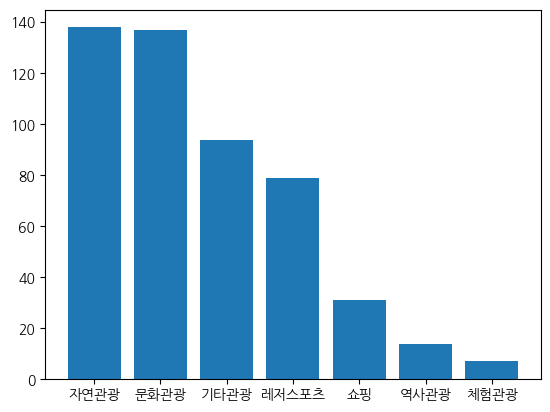

In [ ]:
plt.bar(mid_cat.index, mid_cat)
plt.show()

In [ ]:
low_cat = place['소분류 카테고리'].value_counts()
low_cat

자연경관(하천/해양)    79
기타관광           61
육상레저스포츠        50
전시시설           43
자연경관(산)        38
테마공원           29
도시공원           27
시장             18
데이트코스          18
기타레저스포츠        16
교통시설           15
수상레저스포츠        13
복합관광시설         13
공연시설           12
자연공원           11
역사유적지           9
대형마트            9
기타문화관광지         8
자연관광(산)         8
농/산/어촌체험        6
종교성지            5
면세점             3
랜드마크관광          3
자연생태            2
레저스포츠시설         2
웰니스관광           1
쇼핑몰             1
Name: 소분류 카테고리, dtype: int64

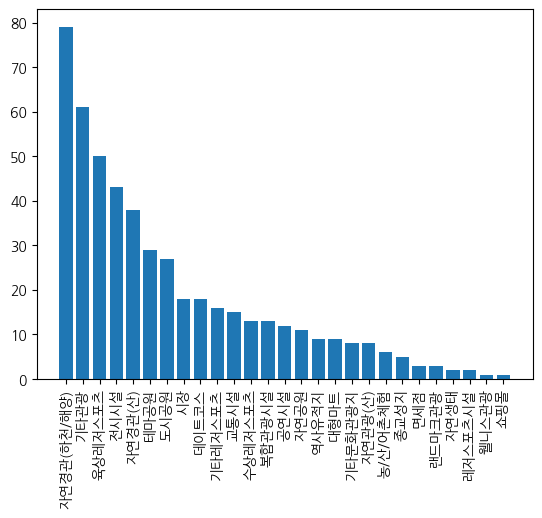

In [ ]:
plt.bar(low_cat.index, low_cat)
plt.xticks(rotation=90)  # x축 글자 90도로 돌림
plt.show()

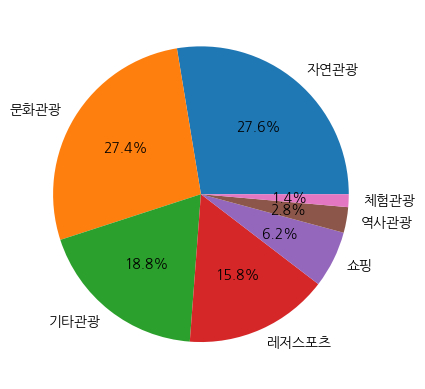

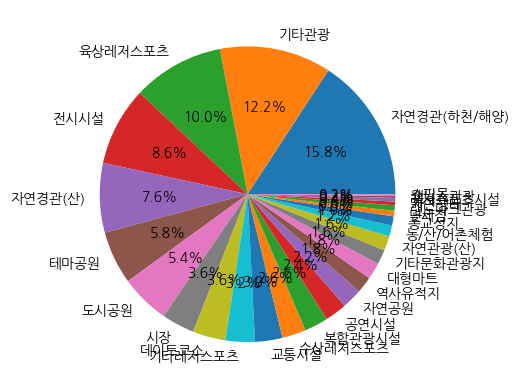

In [ ]:
# pie chart : 전체에서 부분이 어느정도 차지하고 있는가

# 중분류

plt.pie(mid_cat, labels=mid_cat.index, autopct='%.1f%%')
plt.show()

# 소분류

plt.pie(low_cat, labels=low_cat.index, autopct='%.1f%%')
plt.show()

In [ ]:
# 소분류 카테고리의 경우 -> 상위 10개 값만 사용

low_cat[:10]
low_cat.head(10)

자연경관(하천/해양)    79
기타관광           61
육상레저스포츠        50
전시시설           43
자연경관(산)        38
테마공원           29
도시공원           27
시장             18
데이트코스          18
기타레저스포츠        16
Name: 소분류 카테고리, dtype: int64

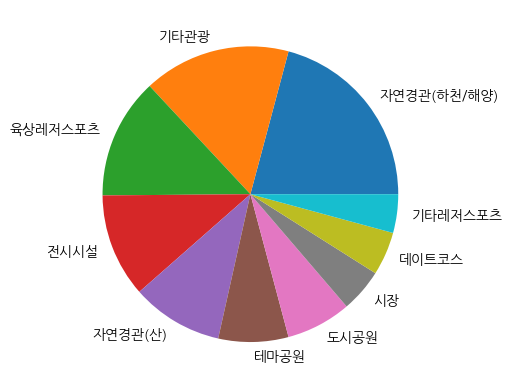

In [ ]:
plt.pie(low_cat[:10], labels=low_cat[:10].index)
plt.show()

In [ ]:
# 기존에 가지고 있던 데이터셋 기준이 아니라 새롭게 정렬 -> 조건이 될 수 없다.
# place['소분류 카테고리'].value_counts().head(10)

place[place["소분류 카테고리"].isin(place["소분류 카테고리"].value_counts()[:10].index)]

Index(['자연경관(하천/해양)', '기타관광', '육상레저스포츠', '전시시설', '자연경관(산)', '테마공원', '도시공원',
       '시장', '데이트코스', '기타레저스포츠'],
      dtype='object')

In [ ]:
# 자연경관

nature = place[place['소분류 카테고리'] == '자연경관(하천/해양)']
nature

,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
순위,,,,,,
4,함덕해수욕장,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
6,협재해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),186252
7,이호테우해변,제주시,제주 제주시,자연관광,자연경관(하천/해양),134970
10,곽지해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),111702
22,김녕해수욕장,제주시,제주 제주시 해맞이해안로 7-6,자연관광,자연경관(하천/해양),78488
...,...,...,...,...,...,...
455,하효항,서귀포시,제주 서귀포시 쇠소깍로 0-0,자연관광,자연경관(하천/해양),2292
474,구두미포구,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),2068
483,제주항,제주시,제주 제주시 임항로 97-0,자연관광,자연경관(하천/해양),1997


In [ ]:
nature['검색건수'].sum()

1742995

In [ ]:
nature['관광지명'].unique()  # nature 자연경관 -> 바다에 관련된 정보

array(['함덕해수욕장', '협재해수욕장', '이호테우해변', '곽지해수욕장', '김녕해수욕장', '금능해수욕장',
       '중문색달해변', '월정리해변', '표선해수욕장', '성산항', '광치기해변', '사계해수욕장', '세화해수욕장',
       '운진항', '판포포구', '모슬포항', '제주항제6부두', '삼양해수욕장', '제주항제4부두', '애월항',
       '황우지해안', '화순금모래해변', '법환포구', '한담해변', '하우목동항', '한림항', '홍조단괴해빈',
       '논짓물', '검멀레해수욕장', '도두항', '천진항', '구엄리돌염전', '서귀포항', '위미항', '하도해수욕장',
       '평대리해수욕장', '신양섭지해수욕장', '코난비치', '비양도', '오조포구', '제주항제2부두', '제주항제3부두',
       '보목포구', '신창풍차해안', '가파도', '화순항', '하고수동해수욕장', '대평포구', '사계항', '차귀도',
       '신도포구', '강정포구', '코난해변', '용수리포구', '제주항제9부두', '월령포구', '자구내포구',
       '구엄포구', '종달리해변', '제주항제7부두', '하모해수욕장', '세기알해변', '고내포구', '차귀도포구',
       '쇠소깍해변', '월평포구', '대포포구', '남원포구', '신흥해수욕장', '영락리방파제', '용담포구',
       '소금막해변', '수산저수지', '신창항', '하효항', '구두미포구', '제주항', '김녕포구', '동일리포구'],
      dtype=object)

In [ ]:
# 관광지 초점 -> 항구, 포구, 염전, 부두, 저수지 제외 -> 해수욕장만 남김

# '항' 삭제

nature = nature.drop(labels=nature[nature['관광지명'].str[-1] == '항'].index, axis=0)

In [ ]:
nature['관광지명'].unique()

array(['함덕해수욕장', '협재해수욕장', '이호테우해변', '곽지해수욕장', '김녕해수욕장', '금능해수욕장',
       '중문색달해변', '월정리해변', '표선해수욕장', '광치기해변', '사계해수욕장', '세화해수욕장', '판포포구',
       '제주항제6부두', '삼양해수욕장', '제주항제4부두', '황우지해안', '화순금모래해변', '법환포구', '한담해변',
       '홍조단괴해빈', '논짓물', '검멀레해수욕장', '구엄리돌염전', '하도해수욕장', '평대리해수욕장',
       '신양섭지해수욕장', '코난비치', '비양도', '오조포구', '제주항제2부두', '제주항제3부두', '보목포구',
       '신창풍차해안', '가파도', '하고수동해수욕장', '대평포구', '차귀도', '신도포구', '강정포구', '코난해변',
       '용수리포구', '제주항제9부두', '월령포구', '자구내포구', '구엄포구', '종달리해변', '제주항제7부두',
       '하모해수욕장', '세기알해변', '고내포구', '차귀도포구', '쇠소깍해변', '월평포구', '대포포구',
       '남원포구', '신흥해수욕장', '영락리방파제', '용담포구', '소금막해변', '수산저수지', '구두미포구',
       '김녕포구', '동일리포구'], dtype=object)

In [ ]:
# '포구' 삭제

nature = nature.drop(labels=nature[nature['관광지명'].str[-2:] == '포구'].index, axis=0)

In [ ]:
nature['관광지명'].unique()

array(['함덕해수욕장', '협재해수욕장', '이호테우해변', '곽지해수욕장', '김녕해수욕장', '금능해수욕장',
       '중문색달해변', '월정리해변', '표선해수욕장', '광치기해변', '사계해수욕장', '세화해수욕장',
       '제주항제6부두', '삼양해수욕장', '제주항제4부두', '황우지해안', '화순금모래해변', '한담해변',
       '홍조단괴해빈', '논짓물', '검멀레해수욕장', '구엄리돌염전', '하도해수욕장', '평대리해수욕장',
       '신양섭지해수욕장', '코난비치', '비양도', '제주항제2부두', '제주항제3부두', '신창풍차해안', '가파도',
       '하고수동해수욕장', '차귀도', '코난해변', '제주항제9부두', '종달리해변', '제주항제7부두', '하모해수욕장',
       '세기알해변', '쇠소깍해변', '신흥해수욕장', '영락리방파제', '소금막해변', '수산저수지'],
      dtype=object)

In [ ]:
# '부두' 삭제

nature = nature.drop(labels=nature[nature['관광지명'].str[-2:] == '부두'].index, axis=0)

In [ ]:
# '염전' 삭제

nature = nature.drop(labels=nature[nature['관광지명'].str[-2:] == '염전'].index, axis=0)

In [ ]:
# '저수지' 삭제

nature = nature.drop(labels=nature[nature['관광지명'].str[-3:] == '저수지'].index, axis=0)

In [ ]:
# '방파제' 삭제

nature = nature.drop(labels=nature[nature['관광지명'].str[-3:] == '방파제'].index, axis=0)

In [ ]:
nature['관광지명'].unique()

array(['함덕해수욕장', '협재해수욕장', '이호테우해변', '곽지해수욕장', '김녕해수욕장', '금능해수욕장',
       '중문색달해변', '월정리해변', '표선해수욕장', '광치기해변', '사계해수욕장', '세화해수욕장', '삼양해수욕장',
       '황우지해안', '화순금모래해변', '한담해변', '홍조단괴해빈', '논짓물', '검멀레해수욕장', '하도해수욕장',
       '평대리해수욕장', '신양섭지해수욕장', '코난비치', '비양도', '신창풍차해안', '가파도', '하고수동해수욕장',
       '차귀도', '코난해변', '종달리해변', '하모해수욕장', '세기알해변', '쇠소깍해변', '신흥해수욕장',
       '소금막해변'], dtype=object)

In [ ]:
nature

,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
순위,,,,,,
4,함덕해수욕장,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
6,협재해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),186252
7,이호테우해변,제주시,제주 제주시,자연관광,자연경관(하천/해양),134970
10,곽지해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),111702
22,김녕해수욕장,제주시,제주 제주시 해맞이해안로 7-6,자연관광,자연경관(하천/해양),78488
23,금능해수욕장,제주시,제주 제주시 금능길 119-10,자연관광,자연경관(하천/해양),77609
29,중문색달해변,서귀포시,제주 서귀포시 중문관광로72번길 0-0,자연관광,자연경관(하천/해양),61889
32,월정리해변,제주시,제주 제주시,자연관광,자연경관(하천/해양),58431
33,표선해수욕장,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),56866


In [ ]:
# 정리된 바다 데이터의 기초 통계 확인

nature.describe()

,검색건수
count,35.000000
mean,37293.314286
std,50415.449007
min,2751.000000
25%,6737.000000
50%,13206.000000
75%,53093.000000
max,195477.000000


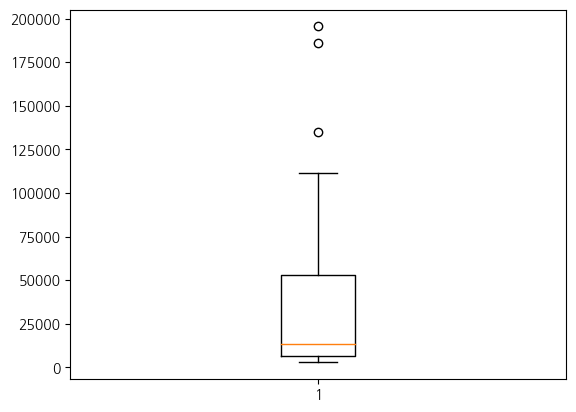

In [ ]:
# 이상치 -> 검색량이 너무 많다 -> 혼잡도가 높다

plt.boxplot(nature['검색건수'])
plt.show()

In [ ]:
# 상위 경계값 -> 혼잡도가 높다

IQR = 53093 - 6737
upper_line = 53093 + IQR * 1.5
upper_line

122627.0

In [ ]:
import numpy as np

In [ ]:
# 상위 경계값을 초과하는 값들을 지워준다

nature['혼잡도'] = np.where(nature['검색건수'] > upper_line, '혼잡', '보통')
nature

,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수,혼잡도
순위,,,,,,,
4,함덕해수욕장,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477,혼잡
6,협재해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),186252,혼잡
7,이호테우해변,제주시,제주 제주시,자연관광,자연경관(하천/해양),134970,혼잡
10,곽지해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),111702,보통
22,김녕해수욕장,제주시,제주 제주시 해맞이해안로 7-6,자연관광,자연경관(하천/해양),78488,보통
23,금능해수욕장,제주시,제주 제주시 금능길 119-10,자연관광,자연경관(하천/해양),77609,보통
29,중문색달해변,서귀포시,제주 서귀포시 중문관광로72번길 0-0,자연관광,자연경관(하천/해양),61889,보통
32,월정리해변,제주시,제주 제주시,자연관광,자연경관(하천/해양),58431,보통
33,표선해수욕장,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),56866,보통


In [ ]:
place

,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
순위,,,,,,
1,제주국제공항,제주시,제주 제주시 공항로 2-0,기타관광,교통시설,803524
2,동문재래시장,제주시,제주 제주시 관덕로14길 20-0,쇼핑,시장,301089
3,서귀포매일올레시장,서귀포시,제주 서귀포시 중앙로62번길 18-0,쇼핑,시장,267930
4,함덕해수욕장,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
5,성산일출봉,서귀포시,제주 서귀포시 일출로 284-12,자연관광,자연경관(산),195037
...,...,...,...,...,...,...
495,퍼시픽마리나,서귀포시,제주 서귀포시 중문관광로 154-17,레저스포츠,수상레저스포츠,1913
497,쉬리의언덕,서귀포시,제주 서귀포시,기타관광,기타관광,1908
498,선운정사,제주시,제주 제주시 구몰동길 65-0,역사관광,종교성지,1902


In [ ]:
# 제주시, 서귀포시 바다

j = nature[nature['시/군/구'] == '제주시']
j.describe()

,검색건수
count,23.000000
mean,44179.260870
std,59325.337333
min,2837.000000
25%,6822.000000
50%,12947.000000
75%,68020.000000
max,195477.000000


In [ ]:
s = nature[nature['시/군/구'] == '서귀포시']
s.describe()

,검색건수
count,12.000000
mean,24095.250000
std,22979.536075
min,2751.000000
25%,6119.250000
50%,15008.500000
75%,48893.250000
max,61889.000000


In [ ]:
# groupby

groupby_city = nature.groupby('시/군/구')['검색건수'].sum()
groupby_city

시/군/구
서귀포시     289143
제주시     1016123
Name: 검색건수, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

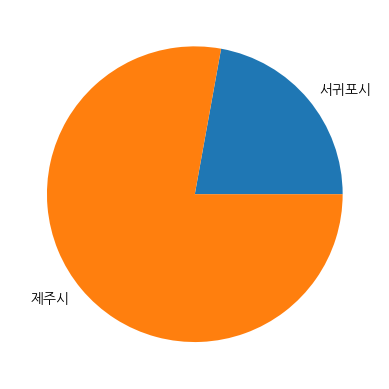

In [ ]:
# nature 검색수 안에서 제주시, 서귀포시가 어느정도 검색량을 차지하고 있는지

label = ['서귀포시', '제주시']
plt.pie(groupby_city, labels=label)
plt.show

## 코로나 지역별 데이터

In [ ]:
region = pd.read_csv('region.csv')

In [ ]:
region.head()

,day,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역,총확진자수
0,2020-03-01,82,81,2569,6,9,13,17,1,84,7,11,60,5,3,514,62,2,0,3526
1,2020-03-02,91,88,3081,7,9,14,20,1,92,19,11,78,6,5,624,64,2,0,4212
2,2020-03-03,98,90,3601,7,11,14,20,1,94,20,11,81,7,5,685,64,3,0,4812
3,2020-03-04,99,93,4006,9,13,15,23,1,101,21,11,82,7,5,774,65,3,0,5328
4,2020-03-05,103,92,4326,9,14,16,23,1,110,23,12,86,7,5,861,74,4,0,5766


In [ ]:
region.tail()

,day,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역,총확진자수
27,2020-03-28,390,114,6587,51,20,31,39,44,433,32,41,126,10,8,1285,91,8,168,9478
28,2020-03-29,410,117,6610,58,20,34,39,46,448,34,41,127,12,9,1287,94,8,189,9583
29,2020-03-30,426,118,6624,58,20,34,39,46,463,36,44,127,13,9,1298,95,9,202,9661
30,2020-03-31,450,119,6684,64,20,36,39,46,476,36,44,128,13,9,1300,96,9,217,9786
31,2020-04-01,474,122,6704,69,24,36,39,46,499,38,44,131,14,12,1302,100,9,224,9887


In [ ]:
region = region.set_index('day')

In [ ]:
region.head()

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역,총확진자수
day,,,,,,,,,,,,,,,,,,,
2020-03-01,82,81,2569,6,9,13,17,1,84,7,11,60,5,3,514,62,2,0,3526
2020-03-02,91,88,3081,7,9,14,20,1,92,19,11,78,6,5,624,64,2,0,4212
2020-03-03,98,90,3601,7,11,14,20,1,94,20,11,81,7,5,685,64,3,0,4812
2020-03-04,99,93,4006,9,13,15,23,1,101,21,11,82,7,5,774,65,3,0,5328
2020-03-05,103,92,4326,9,14,16,23,1,110,23,12,86,7,5,861,74,4,0,5766


In [ ]:
region.describe()

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역,총확진자수
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,252.875000,104.031250,5708.000000,30.468750,16.312500,22.718750,30.093750,27.750000,262.625000,28.312500,29.406250,109.937500,8.656250,5.656250,1116.750000,84.125000,4.750000,50.031250,7892.500000
std,119.194541,9.888032,1092.033587,18.268578,3.430767,6.456976,7.077267,18.949849,131.360806,5.716064,10.585624,17.586537,2.252015,2.103904,207.187308,9.338612,1.934408,76.012089,1661.291686
min,82.000000,81.000000,2569.000000,6.000000,9.000000,13.000000,17.000000,1.000000,84.000000,7.000000,11.000000,60.000000,5.000000,3.000000,514.000000,62.000000,2.000000,0.000000,3526.000000
25%,127.500000,96.000000,5523.500000,9.000000,14.750000,18.000000,24.000000,5.250000,149.250000,27.750000,24.750000,101.000000,7.000000,4.000000,1100.500000,83.000000,4.000000,0.000000,7320.000000
50%,259.000000,107.000000,6082.000000,30.500000,16.000000,22.000000,28.000000,40.000000,246.500000,29.000000,31.000000,115.000000,7.000000,5.000000,1166.500000,85.500000,4.000000,5.000000,8278.000000
75%,337.250000,111.250000,6445.500000,41.250000,19.000000,24.000000,36.250000,42.500000,371.250000,30.250000,38.000000,120.750000,10.000000,6.500000,1258.250000,90.000000,4.500000,75.500000,9062.000000
max,474.000000,122.000000,6704.000000,69.000000,24.000000,36.000000,39.000000,46.000000,499.000000,38.000000,44.000000,131.000000,14.000000,12.000000,1302.000000,100.000000,9.000000,224.000000,9887.000000


In [ ]:
region.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 2020-03-01 to 2020-04-01
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   서울      32 non-null     int64
 1   부산      32 non-null     int64
 2   대구      32 non-null     int64
 3   인천      32 non-null     int64
 4   광주      32 non-null     int64
 5   대전      32 non-null     int64
 6   울산      32 non-null     int64
 7   세종      32 non-null     int64
 8   경기      32 non-null     int64
 9   강원      32 non-null     int64
 10  충북      32 non-null     int64
 11  충남      32 non-null     int64
 12  전북      32 non-null     int64
 13  전남      32 non-null     int64
 14  경북      32 non-null     int64
 15  경남      32 non-null     int64
 16  제주      32 non-null     int64
 17  검역      32 non-null     int64
 18  총확진자수   32 non-null     int64
dtypes: int64(19)
memory usage: 5.0+ KB


In [ ]:
region.index = pd.to_datetime(region.index, format='%Y-%m-%d')
region.head()

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역,총확진자수
day,,,,,,,,,,,,,,,,,,,
2020-03-01,82,81,2569,6,9,13,17,1,84,7,11,60,5,3,514,62,2,0,3526
2020-03-02,91,88,3081,7,9,14,20,1,92,19,11,78,6,5,624,64,2,0,4212
2020-03-03,98,90,3601,7,11,14,20,1,94,20,11,81,7,5,685,64,3,0,4812
2020-03-04,99,93,4006,9,13,15,23,1,101,21,11,82,7,5,774,65,3,0,5328
2020-03-05,103,92,4326,9,14,16,23,1,110,23,12,86,7,5,861,74,4,0,5766


In [ ]:
region.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2020-03-01 to 2020-04-01
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   서울      32 non-null     int64
 1   부산      32 non-null     int64
 2   대구      32 non-null     int64
 3   인천      32 non-null     int64
 4   광주      32 non-null     int64
 5   대전      32 non-null     int64
 6   울산      32 non-null     int64
 7   세종      32 non-null     int64
 8   경기      32 non-null     int64
 9   강원      32 non-null     int64
 10  충북      32 non-null     int64
 11  충남      32 non-null     int64
 12  전북      32 non-null     int64
 13  전남      32 non-null     int64
 14  경북      32 non-null     int64
 15  경남      32 non-null     int64
 16  제주      32 non-null     int64
 17  검역      32 non-null     int64
 18  총확진자수   32 non-null     int64
dtypes: int64(19)
memory usage: 5.0 KB


In [ ]:
region.isna().sum()

서울       0
부산       0
대구       0
인천       0
광주       0
대전       0
울산       0
세종       0
경기       0
강원       0
충북       0
충남       0
전북       0
전남       0
경북       0
경남       0
제주       0
검역       0
총확진자수    0
dtype: int64

In [ ]:
region.columns[:-1]

Index(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주', '검역'],
      dtype='object')

In [ ]:
# 전국 확진자수
# region.iloc[0:2]
# cities = ['서울', '부산', '대구', '인천', '광주', '대전']
# loc[인덱스, 컬럼] -> 특정 값
cities = region.loc[:, region.columns[:-1]]
cities.head()

,day,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역
0,2020-03-01,82,81,2569,6,9,13,17,1,84,7,11,60,5,3,514,62,2,0
1,2020-03-02,91,88,3081,7,9,14,20,1,92,19,11,78,6,5,624,64,2,0
2,2020-03-03,98,90,3601,7,11,14,20,1,94,20,11,81,7,5,685,64,3,0
3,2020-03-04,99,93,4006,9,13,15,23,1,101,21,11,82,7,5,774,65,3,0
4,2020-03-05,103,92,4326,9,14,16,23,1,110,23,12,86,7,5,861,74,4,0


In [ ]:
total = region.loc[:, '총확진자수']
total.head()

0    3526
1    4212
2    4812
3    5328
4    5766
Name: 총확진자수, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

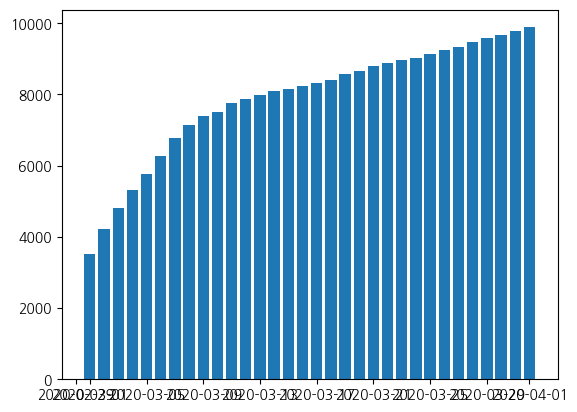

In [ ]:
plt.bar(total.index, total)
plt.show

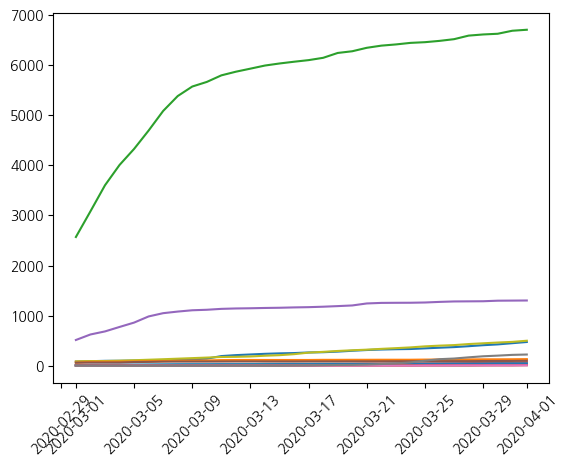

In [ ]:
# 지역별 그래프
# 지역(y)만 다르고 인덱스(x)동일
# 하나의 영역 안에 여러 그래프
# Index(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남',
#       '전북', '전남', '경북', '경남', '제주', '검역'],
#       dtype='object')

plt.plot(cities)
plt.xticks(rotation=45)
plt.show()

# 그래프가 식별이 잘 되지 않을 때, 그래프의 범위를 바꾸거나 or 그래프를 사용

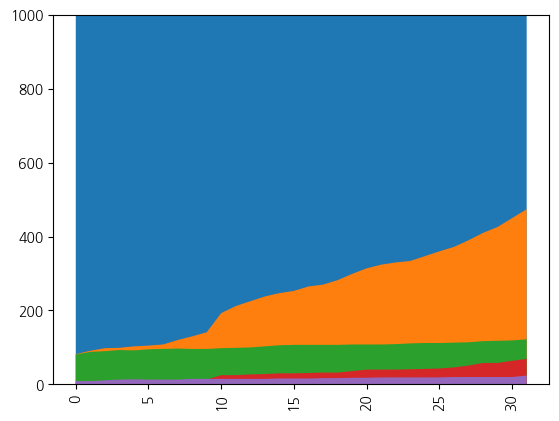

In [ ]:
# 시간 흐름에 따른 확진자 수 누적 그래프
# plt.stackplot(x, y1, y2, y3 ... , labels= )

y1 = cities['서울']
y2 = cities['대구']
y3 = cities['부산']
y4 = cities['인천']
y5 = cities['광주']
label = ['서울', '대구', '부산', '인천', '광주']

plt.stackplot(cities.index, y2)
plt.stackplot(cities.index, y1)
plt.stackplot(cities.index, y3)
plt.stackplot(cities.index, y4)
plt.stackplot(cities.index, y5)

# 그래프 범위 설정

# plt.xlim([])
plt.ylim([0, 1000])
# plt.axis([x최소, x최대, y최소, y최대])
plt.xticks(rotation=90)

# 축 범위 : 최소값, 최대값

# plt.legend(loc='upper left')
plt.show()

In [ ]:
# 제주 지역 확진자

region.head()

,day,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역,총확진자수
0,2020-03-01,82,81,2569,6,9,13,17,1,84,7,11,60,5,3,514,62,2,0,3526
1,2020-03-02,91,88,3081,7,9,14,20,1,92,19,11,78,6,5,624,64,2,0,4212
2,2020-03-03,98,90,3601,7,11,14,20,1,94,20,11,81,7,5,685,64,3,0,4812
3,2020-03-04,99,93,4006,9,13,15,23,1,101,21,11,82,7,5,774,65,3,0,5328
4,2020-03-05,103,92,4326,9,14,16,23,1,110,23,12,86,7,5,861,74,4,0,5766


In [ ]:
jeju = region['제주']
jeju.head()

day
2020-03-01    2
2020-03-02    2
2020-03-03    3
2020-03-04    3
2020-03-05    4
Name: 제주, dtype: int64

In [ ]:
# datetime의 경우 matplotlib.dates의 mdates 모듈이 추가로 필요

import matplotlib.dates as mdates

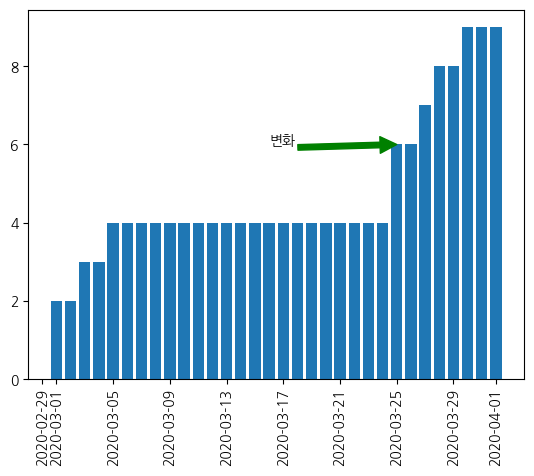

In [ ]:
# 위에서 모듈 임포트 이후에 x값(인덱스)을 mdates.date2num 함수를 이용해서 숫자로 바꿔주면
# annotation 기능을 사용할 수 있음
# 데이터 시각화 -> 어떤 구간에 큰 변화가 있는지
# 변화폭을 민감하게 살펴보자

plt.xticks(rotation=90)
plt.annotate('변화', xy=(mdates.date2num(jeju.index[24]), 6), xytext=(mdates.date2num(jeju.index[15]), 6), arrowprops={'color':'green'})
plt.bar(jeju.index, jeju)

plt.show()

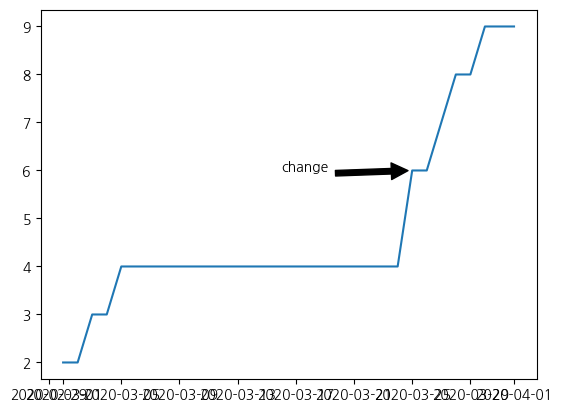

In [ ]:
plt.annotate('change', xy=(mdates.date2num(jeju.index[24]), 6), xytext=(mdates.date2num(jeju.index[15]), 6),
            arrowprops=dict(color='black', shrink=0.05))
plt.plot(jeju)
plt.show()

In [ ]:
# 코로나 지역별 데이터
# 지역명 -> 실제 좌표의 위치
# 좌표 데이터 -> 시청, 도청

loc = {
  '서울' : [37.566418, 126.977950],#서울시청
  '부산' : [35.180152, 129.074980],#부산시청
  '대구' : [35.871468, 128.601757],#대구시청
  '인천' : [37.456445, 126.705873],#인천시청
  '광주' : [35.160068, 126.851426],#광주광역시청
  '대전' : [36.350664, 127.384819],#대전시청
  '울산' : [35.539772, 129.311486],#울산시청
  '세종' : [36.480838, 127.289181],#세종시청
  '경기' : [37.275221, 127.009382],#경기도청
  '강원' : [37.885300, 127.729835],#강원(강원도청)
  '충북' : [36.635947, 127.491345],#충북도청
  '충남' : [36.658826, 126.672849],#충남도청
  '전북' : [35.820599, 127.108759],#전북도청
  '전남' : [34.816351, 126.462924],#전남도청
  '경북' : [36.574108, 128.509303],#경북도청
  '경남' : [35.238398, 128.692371],#경남도청
  '제주' : [33.3617007, 126.511657]#제주
    }
type(loc)

dict

In [ ]:
# 위도 : latitude, 경도 : longitude
loc

{'서울': [37.566418, 126.97795],
 '부산': [35.180152, 129.07498],
 '대구': [35.871468, 128.601757],
 '인천': [37.456445, 126.705873],
 '광주': [35.160068, 126.851426],
 '대전': [36.350664, 127.384819],
 '울산': [35.539772, 129.311486],
 '세종': [36.480838, 127.289181],
 '경기': [37.275221, 127.009382],
 '강원': [37.8853, 127.729835],
 '충북': [36.635947, 127.491345],
 '충남': [36.658826, 126.672849],
 '전북': [35.820599, 127.108759],
 '전남': [34.816351, 126.462924],
 '경북': [36.574108, 128.509303],
 '경남': [35.238398, 128.692371],
 '제주': [33.3617007, 126.511657]}

In [ ]:
loc = pd.DataFrame(loc)
loc

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,37.566418,35.180152,35.871468,37.456445,35.160068,36.350664,35.539772,36.480838,37.275221,37.885300,36.635947,36.658826,35.820599,34.816351,36.574108,35.238398,33.361701
1,126.977950,129.074980,128.601757,126.705873,126.851426,127.384819,129.311486,127.289181,127.009382,127.729835,127.491345,126.672849,127.108759,126.462924,128.509303,128.692371,126.511657


In [ ]:
loc = pd.DataFrame(loc).T  # 행렬 모양 바꾸기
loc

,0,1
서울,37.566418,126.977950
부산,35.180152,129.074980
대구,35.871468,128.601757
인천,37.456445,126.705873
광주,35.160068,126.851426
대전,36.350664,127.384819
울산,35.539772,129.311486
세종,36.480838,127.289181
경기,37.275221,127.009382
강원,37.885300,127.729835


In [ ]:
loc.columns = ['lat', 'lon']
loc

,lat,lon
서울,37.566418,126.977950
부산,35.180152,129.074980
대구,35.871468,128.601757
인천,37.456445,126.705873
광주,35.160068,126.851426
대전,36.350664,127.384819
울산,35.539772,129.311486
세종,36.480838,127.289181
경기,37.275221,127.009382
강원,37.885300,127.729835


## 지도

In [ ]:
# 지도 관련 라이브러리

!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium

In [ ]:
map_osm = folium.Map(location=[33.361701, 126.511657], zoom_start=10)
map_osm

In [ ]:
# 지도 위에 해당하는 지역의 확진자수를 표시

from folium.plugins import MarkerCluster

# 마커 클러스터 사용을 위한 선언

marker_cluster = MarkerCluster().add_to(map_osm)

# folium.Marker([위도, 경도], popup=, icon=folium.Icon(color='red', icon='star')).add_to(marker_cluster)
folium.Marker([33.361701, 126.511657], popup=[33.361701, 126.511657], icon=folium.Icon(color='red', icon='star')).add_to(marker_cluster)

map_osm

In [ ]:
# 각 지역별로 마커 찍기
# 지역별 확진자 합
# folium.Marker([위도, 경도], popup=, icon=folium.Icon(color='red', icon='star')).add_to(marker_cluster)

## 코로나 한국 데이터

In [ ]:
kr = pd.read_csv('total_.csv')
kr.head()

,date,총계,확진자,격리해제,격리중,사망,검사중,결과 음성
0,2020-03-01,96985,3526,30,3479,17,32422,61037
1,2020-03-02,109591,4212,31,4159,22,33799,71580
2,2020-03-03,125851,4812,34,4750,28,35555,85484
3,2020-03-04,136707,5328,41,5255,32,28414,102965
4,2020-03-05,146541,5766,88,5643,35,21810,118965


In [ ]:
kr.tail()

,date,총계,확진자,격리해제,격리중,사망,검사중,결과 음성
27,2020-03-28,387925,9478,4811,4523,144,16564,361883
28,2020-03-29,394141,9583,5033,4398,152,15028,369530
29,2020-03-30,395194,9661,5228,4275,158,13531,372002
30,2020-03-31,410564,9786,5408,4216,162,16892,383886
31,2020-04-01,421547,9887,5567,4155,165,16585,395075


In [ ]:
kr = kr.set_index('date')
kr.head()

,총계,확진자,격리해제,격리중,사망,검사중,결과 음성
date,,,,,,,
2020-03-01,96985,3526,30,3479,17,32422,61037
2020-03-02,109591,4212,31,4159,22,33799,71580
2020-03-03,125851,4812,34,4750,28,35555,85484
2020-03-04,136707,5328,41,5255,32,28414,102965
2020-03-05,146541,5766,88,5643,35,21810,118965


In [ ]:
kr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 2020-03-01 to 2020-04-01
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   총계      32 non-null     int64
 1   확진자     32 non-null     int64
 2   격리해제    32 non-null     int64
 3   격리중     32 non-null     int64
 4   사망      32 non-null     int64
 5   검사중     32 non-null     int64
 6   결과 음성   32 non-null     int64
dtypes: int64(7)
memory usage: 2.0+ KB


In [ ]:
kr.describe()

,총계,확진자,격리해제,격리중,사망,검사중,결과 음성
count,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000
mean,272659.468750,7892.531250,1952.28125,5851.031250,86.062500,18708.312500,246058.656250
std,96168.245376,1661.299996,1962.49330,1213.763847,44.247061,5765.846459,99218.729994
min,96985.000000,3526.000000,30.00000,3479.000000,17.000000,13531.000000,61037.000000
25%,194593.000000,7320.000000,157.00000,4728.750000,50.750000,15384.750000,169335.500000
50%,280610.000000,8278.500000,1269.00000,5984.500000,78.000000,16738.500000,256201.000000
75%,350910.500000,9062.000000,3562.75000,6971.500000,121.500000,18749.000000,326699.000000
max,421547.000000,9887.000000,5567.00000,7470.000000,165.000000,35555.000000,395075.000000


In [ ]:
kr.index = pd.to_datetime(kr.index, format='%Y-%m-%d')
kr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2020-03-01 to 2020-04-01
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   총계      32 non-null     int64
 1   확진자     32 non-null     int64
 2   격리해제    32 non-null     int64
 3   격리중     32 non-null     int64
 4   사망      32 non-null     int64
 5   검사중     32 non-null     int64
 6   결과 음성   32 non-null     int64
dtypes: int64(7)
memory usage: 2.0 KB


In [ ]:
kr.isna().sum()

총계       0
확진자      0
격리해제     0
격리중      0
사망       0
검사중      0
결과 음성    0
dtype: int64

In [ ]:
kr.head()

,총계,확진자,격리해제,격리중,사망,검사중,결과 음성
date,,,,,,,
2020-03-01,96985,3526,30,3479,17,32422,61037
2020-03-02,109591,4212,31,4159,22,33799,71580
2020-03-03,125851,4812,34,4750,28,35555,85484
2020-03-04,136707,5328,41,5255,32,28414,102965
2020-03-05,146541,5766,88,5643,35,21810,118965


In [ ]:
# 확진자(양성)

kr['확진자']

date
2020-03-01    3526
2020-03-02    4212
2020-03-03    4812
2020-03-04    5328
2020-03-05    5766
2020-03-06    6284
2020-03-07    6767
2020-03-08    7134
2020-03-09    7382
2020-03-10    7513
2020-03-11    7755
2020-03-12    7869
2020-03-13    7979
2020-03-14    8086
2020-03-15    8162
2020-03-16    8236
2020-03-17    8321
2020-03-18    8413
2020-03-19    8565
2020-03-20    8652
2020-03-21    8799
2020-03-22    8897
2020-03-23    8961
2020-03-24    9037
2020-03-25    9137
2020-03-26    9241
2020-03-27    9332
2020-03-28    9478
2020-03-29    9583
2020-03-30    9661
2020-03-31    9786
2020-04-01    9887
Name: 확진자, dtype: int64

In [ ]:
kr['결과 음성']

date
2020-03-01     61037
2020-03-02     71580
2020-03-03     85484
2020-03-04    102965
2020-03-05    118965
2020-03-06    136624
2020-03-07    151802
2020-03-08    162008
2020-03-09    171778
2020-03-10    184179
2020-03-11    196100
2020-03-12    209402
2020-03-13    222728
2020-03-14    235615
2020-03-15    243778
2020-03-16    251297
2020-03-17    261105
2020-03-18    270888
2020-03-19    282555
2020-03-20    292487
2020-03-21    303006
2020-03-22    308343
2020-03-23    315447
2020-03-24    324105
2020-03-25    334481
2020-03-26    341332
2020-03-27    352410
2020-03-28    361883
2020-03-29    369530
2020-03-30    372002
2020-03-31    383886
2020-04-01    395075
Name: 결과 음성, dtype: int64

In [ ]:
# 데이터 타입들 중 컬럼들이 서로 상관성이 있거나 반대 성향(경향)이 있으면 서로 비교 -> 상관관계, 상관계수

pos = kr['확진자']
neg = kr['결과 음성']

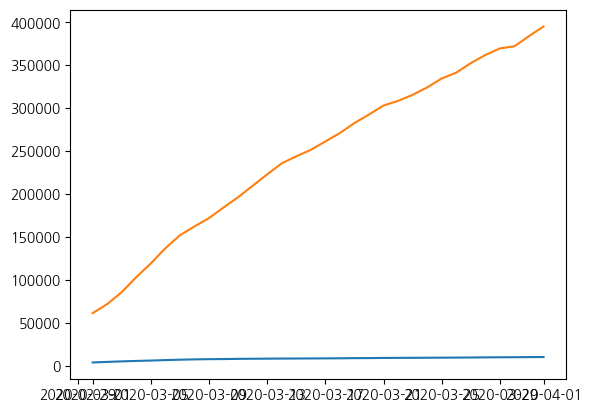

In [ ]:
plt.plot(pos)
plt.plot(neg)

plt.show()

In [ ]:
# 두 데이터(컬럼)를 합쳐서 하나의 결과를 도출
# 확진자수 중 사망 -> 사망률

death = kr['사망']

# death/pos * 100

In [ ]:
d_p = round((death / pos) * 100, 2)
d_p.head()

date
2020-03-01    0.48
2020-03-02    0.52
2020-03-03    0.58
2020-03-04    0.60
2020-03-05    0.61
dtype: float64

In [ ]:
# 완치율
# 격리해제 수

rec = kr['격리해제']

# rec/pos * 100 

In [ ]:
r_p = round((rec / pos) * 100, 2)
r_p.head()

date
2020-03-01    0.85
2020-03-02    0.74
2020-03-03    0.71
2020-03-04    0.77
2020-03-05    1.53
dtype: float64

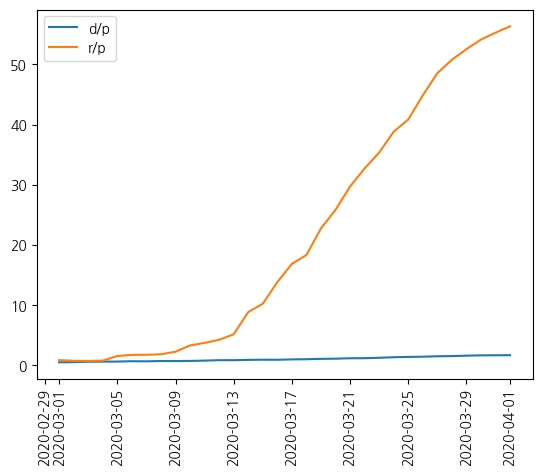

In [ ]:
# 완치율이 유의미하게 증가한다

plt.plot(d_p, label='d/p')
plt.plot(r_p, label='r/p')

plt.xticks(rotation=90)
plt.legend()

plt.show()

In [ ]:
# 3월 데이터
# 사망율, 완치율 -> 파이

# 4월 데이터
# 사망율, 완치율 -> 파이

In [ ]:
# 시계열 데이터 -> 흐름, 변화

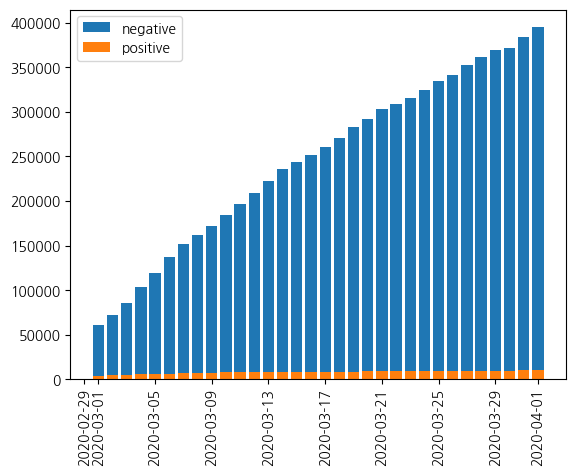

In [ ]:
# 양성 음성 -> 반대되는 데이터
# 가로(x) : 시간, 세로(y) : 수
# 가로 : 비교할 데이터 -> 양성, 음성

plt.xticks(rotation=90)
plt.legend()

plt.bar(neg.index, neg, label='negative')
plt.bar(pos.index, pos, label='positive')

plt.show()

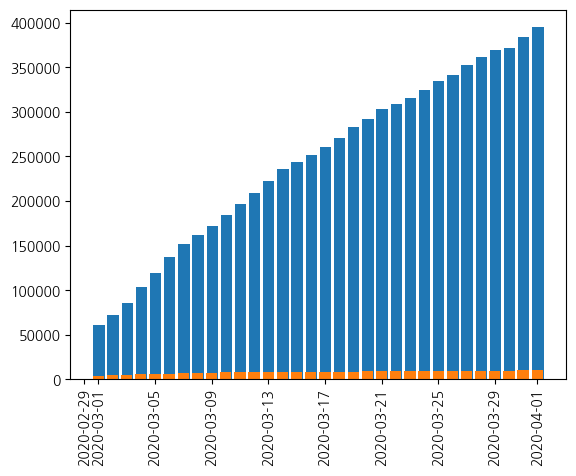

In [ ]:
# 추가 설명: index(datetime) + timedelta

# np.timedelta64(시간, ('h','m','s'))
w = np.timedelta64(60, 'm')

plt.xticks(rotation=90)
plt.bar(neg.index + w, neg)
plt.bar(pos.index, pos)

plt.show()

In [ ]:
# 양성(총 합), 음성(총 합)

sum_p = pos.sum()
sum_p

252561

In [ ]:
sum_n = neg.sum()
sum_n

7873877

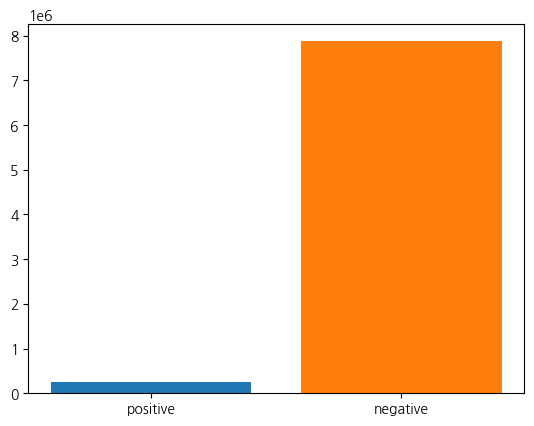

In [ ]:
# 몇 명 -> 합

plt.bar('positive', sum_p)
plt.bar('negative', sum_n)
plt.show()

In [ ]:
# 사망자 수, 사망률

# 사망자 수

death.head()

date
2020-03-01    17
2020-03-02    22
2020-03-03    28
2020-03-04    32
2020-03-05    35
Name: 사망, dtype: int64

In [ ]:
# 사망률

d_p.head()

date
2020-03-01    0.48
2020-03-02    0.52
2020-03-03    0.58
2020-03-04    0.60
2020-03-05    0.61
dtype: float64

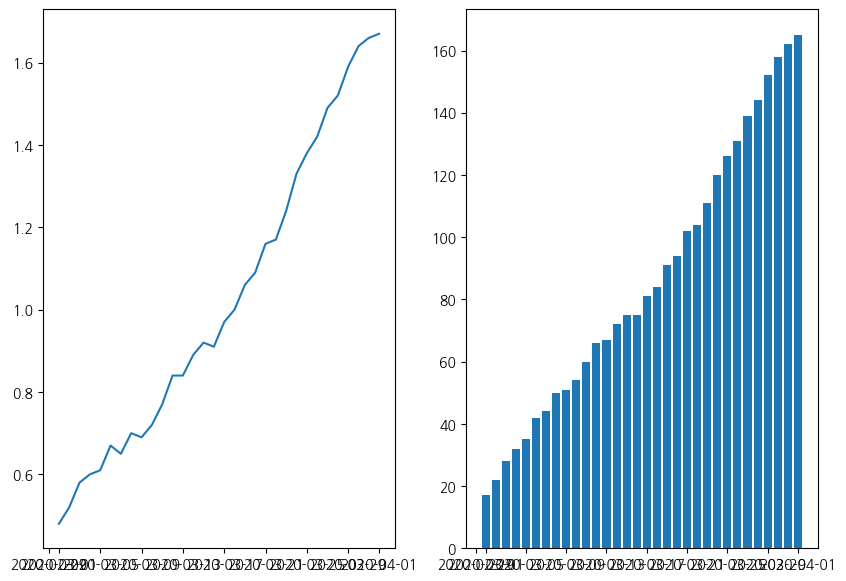

In [ ]:
plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.plot(d_p)

plt.subplot(1, 2, 2)
plt.bar(death.index, death)

plt.show()

In [ ]:
# 전체 - 부분
# 어떤 값이 전체에서 어느 정도 차지하고 있느냐

# 시계열 -> 변화, 흐름
# 1. 경향(성) -> 크게 변하는 시점 (상승, 하강, 반복)
# 2. 비율 -> 시간의 흐름에 따라 특정한 부분이 얼마나 영향을 끼치고 있는지

# 확진자 중 사망자(얼마나), 완치자(얼마나) : 일 별
# 격리 중, 격리 해제 비율
# 검사 중 양성, 음성
# 주말 전후 양성 비율 변화
# 주말 전후 검사량 변화

In [ ]:
# 확진자 중 사망자(얼마나), 완치자(얼마나) : 일 별

death  # 사망
rec  # 격리해제

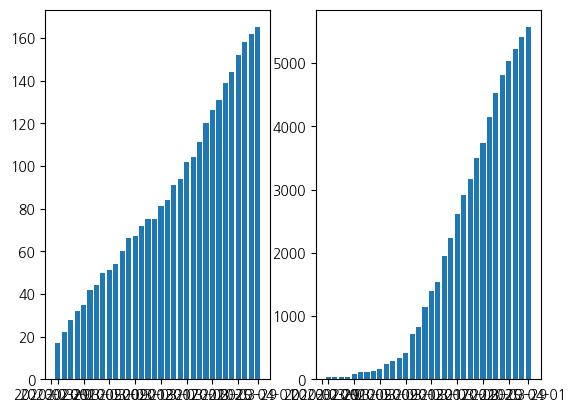

In [ ]:
plt.subplot(1, 2, 1)
plt.bar(death.index, death)

plt.subplot(1, 2, 2)
plt.bar(rec.index, rec)

plt.show()

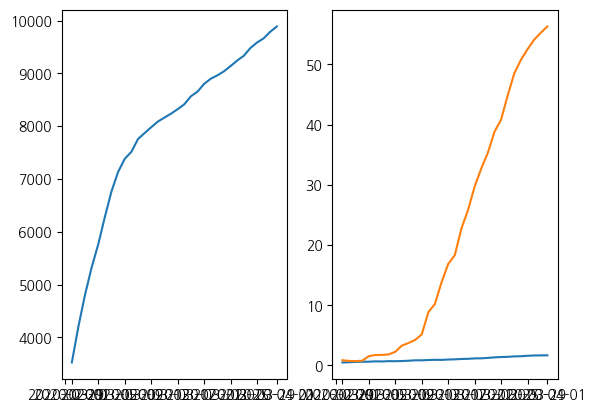

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(pos)

plt.subplot(1, 2, 2)
plt.plot(d_p)
plt.plot(r_p)

plt.show()
# 확진자는 계속 증가한다.
# 사망, 격리해제 증가
# 확진자 증가하는 경향, 완치자(격치해제)가 증가하는 경향이 훨씬 유사하다